In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import yfinance as yf
from matplotlib import rc
import platform
from datetime import datetime
# 그래프에서 한글 깨짐 방지
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')


In [18]:
# # 삼성전자, KOSPI 데이터 불러오기
# stock_price = yf.download({'005930.KS','^KS11'}, '2022-01-01', '2022-01-21')

# stock_price

# yfinance 데이터 불러오기
stock_price = yf.download({'005930.KS','^KS11'}, '2019-01-01', '2022-01-01', period='1d')
stock_price

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2019-01-02  34482.312500  2010.000000   38750.0  2010.000000   39400.0   
2019-01-03  33458.964844  1993.699951   37600.0  1993.699951   38550.0   
2019-01-04  33325.488281  2010.250000   37450.0  2010.250000   37600.0   
2019-01-07  34482.312500  2037.099976   38750.0  2037.099976   38900.0   
2019-01-08  33903.902344  2025.270020   38100.0  2025.270020   39200.0   
...                  ...          ...       ...          ...       ...   
2021-12-24  78211.703125  3012.429932   80500.0  3012.429932   80800.0   
2021-12-27  77920.234375  2999.550049   80200.0  2999.550049   80600.0   
2021-12-28  78017.390625  3020.239990   80300.0  3020.239990   80400.0   
2021-12-29  76905.765625  2993.290039   78800.0  2993.290039   80200.0   
2021-12-30  76417.781250  2977.649902   78300.0  2977.649902   79500.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2019-01-02  2053.449951   38550.0  2004.270020   39400.0  2050.550049   
2019-01-03  2014.719971   37450.0  1991.650024   38300.0  2011.810059   
2019-01-04  2011.560059   36850.0  1984.530029   37450.0  1992.400024   
2019-01-07  2048.060059   37800.0  2030.900024   38000.0  2034.239990   
2019-01-08  2042.699951   37950.0  2023.589966   38000.0  2038.680054   
...                 ...       ...          ...       ...          ...   
2021-12-24  3025.770020   80200.0  3009.479980   80200.0  3009.479980   
2021-12-27  3017.310059   79800.0  2999.300049   80600.0  3013.939941   
2021-12-28  3020.290039   79700.0  2991.550049   80200.0  3006.770020   
2021-12-29  3007.719971   78500.0  2988.669922   80200.0  3002.899902   
2021-12-30  3005.360107   78100.0  2975.739990   78900.0  2999.750000   

              Volume          
           005930.KS   ^KS11  
Date                          
2019-01-02   7847664  326400  
2019-01-03  12471493  428000  
2019-01-04  14108958  409000  
2019-01-07  12748997  440200  
2019-01-08  12756554  397800  
...              ...     ...  
2021-12-24  12086380  537500  
2021-12-27  10783368  475000  
2021-12-28  18226325  607000  
2021-12-29  19794795  545800  
2021-12-30  14236700  460600  

[742 rows x 12 columns]

In [26]:
stock_price['년월']=list(map(lambda x: datetime.strftime(x,'%Y-%m'),stock_price.index))
stock_price

stock_pirce_YM=stock_price.loc[stock_price['년월']!=stock_price['년월'].shift(-1)]
stock_pirce_YM
stock_pirce_YM.drop(["년월"],axis=1,inplace=True)
M_P_C=stock_pirce_YM.pct_change().dropna()
M_P_C
# stock_pirce_YM["월월월_Close"]=stock_pirce_YM.shift(1)['Close']['005930.KS'].fillna(0)
# stock_pirce_YM=stock_pirce_YM["월월월_Close"].pct_change()


C:\Users\dgh06\AppData\Local\Temp\ipykernel_24456\1388300125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_pirce_YM.drop(["년월"],axis=1,inplace=True)


Adj Close               Close                High            \
           005930.KS     ^KS11 005930.KS     ^KS11 005930.KS     ^KS11   
Date                                                                     
2019-02-28 -0.022752 -0.004268 -0.022752 -0.004268 -0.011690  0.004971   
2019-03-29 -0.002189 -0.024947 -0.009978 -0.024947 -0.034409 -0.040570   
2019-04-30  0.026876  0.029393  0.026876  0.029393  0.031180  0.033812   
2019-05-31 -0.073064 -0.073448 -0.073064 -0.073448 -0.075594 -0.075310   
2019-06-28  0.114516  0.043532  0.105882  0.043532  0.098131  0.044092   
2019-07-31 -0.035107 -0.049784 -0.035106 -0.049784 -0.008511 -0.045848   
2019-08-30 -0.029769 -0.028036 -0.029768 -0.028036 -0.049356 -0.034270   
2019-09-30  0.122852  0.048410  0.114773  0.048410  0.111738  0.047575   
2019-10-31  0.027523  0.009903  0.027523  0.009903  0.043655  0.018751   
2019-11-29 -0.001984  0.002150 -0.001984  0.002150  0.000000  0.010372   
2019-12-30  0.116478  0.052544  0.109344  0.052544  0.101167  0.038819   
2020-01-31  0.010753 -0.035792  0.010753 -0.035792  0.031802 -0.018482   
2020-02-28 -0.039007 -0.062293 -0.039007 -0.062293 -0.049658 -0.062854   
2020-03-31 -0.112499 -0.116945 -0.119004 -0.116945 -0.126126 -0.134514   
2020-04-29  0.047120  0.109949  0.047120  0.109949  0.041237  0.113607   
2020-05-29  0.014000  0.042124  0.014000  0.042124  0.003960  0.041573   
2020-06-30  0.048383  0.038791  0.041420  0.038791  0.063116  0.046834   
2020-07-31  0.096591  0.066897  0.096591  0.066897  0.105751  0.068887   
2020-08-31 -0.067358  0.034143 -0.067358  0.034143 -0.058725  0.043872   
2020-09-29  0.084408  0.000739  0.077778  0.000739  0.051693 -0.017497   
2020-10-30 -0.027492 -0.026092 -0.027491 -0.026092 -0.016949 -0.008390   
2020-11-30  0.178445  0.142995  0.178445  0.142995  0.182759  0.141565   
2020-12-30  0.244955  0.108874  0.214393  0.108874  0.185131  0.086666   
2021-01-29  0.012346  0.035755  0.012346  0.035755  0.045510  0.077135   
2021-02-26  0.006098  0.012345  0.006098  0.012345 -0.018824 -0.003461   
2021-03-31 -0.008949  0.016087 -0.013333  0.016087 -0.008393  0.001424   
2021-04-30  0.001229  0.028235  0.001229  0.028235 -0.007255  0.027648   
2021-05-31 -0.012270  0.017809 -0.012270  0.017809 -0.018270  0.007819   
2021-06-30  0.006923  0.028952  0.002484  0.028952  0.009926  0.031658   
2021-07-30 -0.027261 -0.028623 -0.027261 -0.028623 -0.030713 -0.021499   
2021-08-31 -0.022930 -0.000952 -0.022930 -0.000952 -0.027883 -0.010749   
2021-09-30 -0.029306 -0.040775 -0.033898 -0.040775 -0.024772 -0.037645   
2021-10-29 -0.058030 -0.031980 -0.058030 -0.031980 -0.042781 -0.015996   
2021-11-30  0.021490 -0.044323  0.021490 -0.044323  0.032123 -0.028790   
2021-12-30  0.103136  0.048834  0.098177  0.048834  0.075778  0.021214   

                 Low                Open              Volume            
           005930.KS     ^KS11 005930.KS     ^KS11 005930.KS     ^KS11  
Date                                                                    
2019-02-28 -0.022752 -0.002626 -0.005359  0.003914  0.090105 -0.064563  
2019-03-29 -0.019956 -0.032508 -0.040948 -0.041733 -0.512429 -0.285098  
2019-04-30  0.026018  0.029312  0.033708  0.035063 -0.032235  0.046078  
2019-05-31 -0.070562 -0.074719 -0.073913 -0.083310  0.022005  0.151547  
2019-06-28  0.107948  0.049927  0.103286  0.052257  0.139295  0.223361  
2019-07-31 -0.036403 -0.053212 -0.017021 -0.046181 -0.005893  0.096966  
2019-08-30 -0.027778 -0.029663 -0.053030 -0.041641 -0.231015 -0.460977  
2019-09-30  0.094857  0.046487  0.098286  0.048220 -0.040605  0.031161  
2019-10-31  0.050104  0.020308  0.061394  0.021239  0.085042  0.408120  
2019-11-29 -0.001988  0.000778  0.003922  0.017380  0.084869 -0.060698  
2019-12-30  0.109562  0.053019  0.097656  0.036269 -0.252481 -0.039003  
2020-01-31  0.012567 -0.034905  0.028470 -0.019077  1.363289  0.706292  
2020-02-28 -0.039007 -0.065214 -0.048443 -0.064996  0.521775 -0.054750  
2020-03-31 -0.130074 -0.130350

C:\Users\dgh06\AppData\Local\Temp\ipykernel_24456\1624657608.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(M_P_C['Adj Close']['^KS11'])
C:\Users\dgh06\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


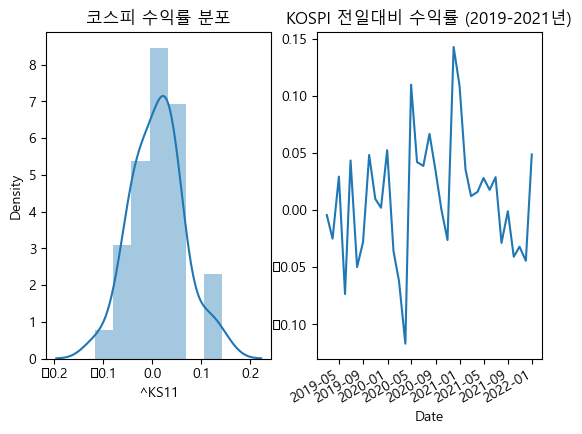

In [4]:
plt.subplot(1,2,1)
sns.distplot(M_P_C['Adj Close']['^KS11'])
plt.title('코스피 수익률 분포')
plt.subplot(1,2,2)
M_P_C['Close']['^KS11'].plot(kind='line')
plt.title('KOSPI 전일대비 수익률 (2019-2021년)')
plt.show()


C:\Users\dgh06\AppData\Local\Temp\ipykernel_24456\3002113997.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(M_P_C['Adj Close']['005930.KS'])
C:\Users\dgh06\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


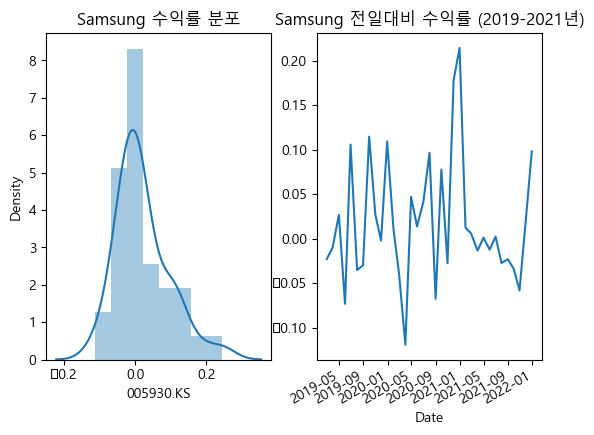

In [5]:
# 삼성전자 전일대비 수익률 그래프 도출

plt.subplot(1,2,1)
sns.distplot(M_P_C['Adj Close']['005930.KS'])
plt.title('Samsung 수익률 분포')
plt.subplot(1,2,2)
M_P_C['Close']['005930.KS'].plot(kind='line')
plt.title('Samsung 전일대비 수익률 (2019-2021년)')
plt.show()

In [6]:
# 정규성 검정 (모수적 특성이 존재하는지 여부 판단)

# shapiro 검정 시행
from scipy.stats import shapiro

for i in ['^KS11', '005930.KS']:
    stats, pval = shapiro(M_P_C['Adj Close'][i])
    print(stats)
    print(pval)

    if pval < .05:
        print(f'{i}의 경우, p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
    else:
        print(f'{i}의 경우, p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

0.9797778725624084
0.7519338130950928
^KS11의 경우, p값이  75.193% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
0.9233997464179993
0.017885828390717506
005930.KS의 경우, p값이  1.789% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.


NameError: name '_pct' is not defined

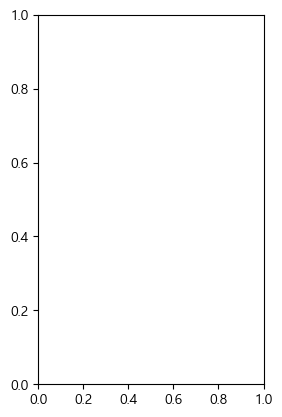

In [7]:
# 코스피 전일대비 수익률 그래프 도출

plt.subplot(1,2,1)
sns.distplot(_pct['Adj Close']['^KS11'])
plt.title('코스피 수익률 분포')
plt.subplot(1,2,2)
_pct['Close']['^KS11'].plot(kind='line')
plt.title('KOSPI 전일대비 수익률 (2019-2021년)')
plt.show()


C:\Users\dgh06\AppData\Local\Temp\ipykernel_27008\2642021521.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(_pct['Adj Close']['005930.KS'])
C:\Users\dgh06\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


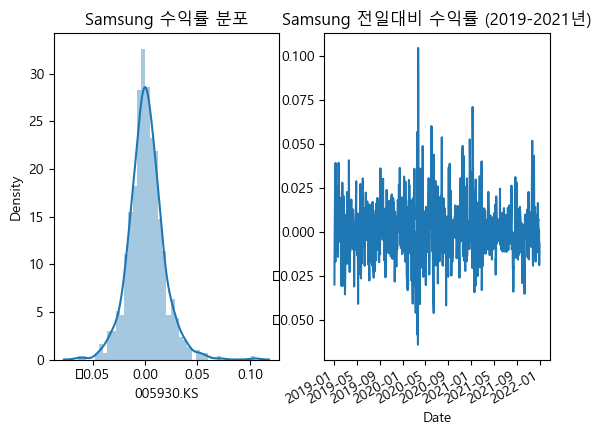

In [ ]:
# 삼성전자 전일대비 수익률 그래프 도출

plt.subplot(1,2,1)
sns.distplot(_pct['Adj Close']['005930.KS'])   # 확률 밀도함수
plt.title('Samsung 수익률 분포')
plt.subplot(1,2,2)
_pct['Close']['005930.KS'].plot(kind='line')
plt.title('Samsung 전일대비 수익률 (2019-2021년)')
plt.show()

In [ ]:
# 정규성 검정 (모수적 특성이 존재하는지 여부 판단)

# shapiro 검정 시행
from scipy.stats import shapiro

for i in ['^KS11', '005930.KS']:
    stats, pval = shapiro(stock_price['Adj Close'][i])
    
    if pval < .05:
        print(f'{i}의 경우, p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
    else:
        print(f'{i}의 경우, p값이 {pval*100 : .3f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

^KS11의 경우, p값이  0.000% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.
005930.KS의 경우, p값이  0.000% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.


# 2. 연속확률분포

## A. 정규분포, 표준정규분포

C:\Users\dgh06\AppData\Local\Temp\ipykernel_24456\822114631.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x1.std(),3)})")


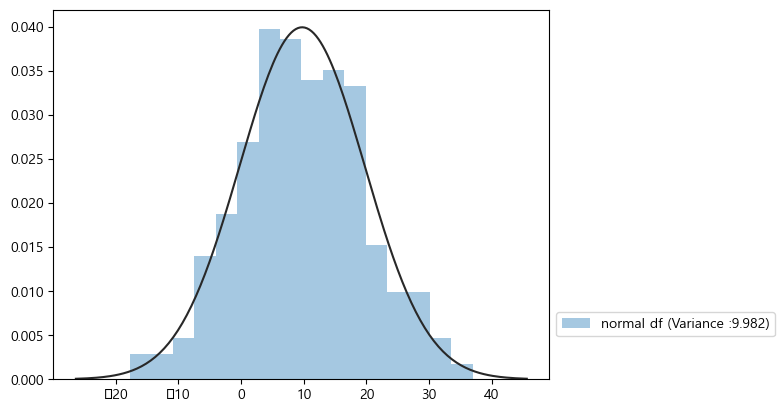

In [10]:
# 정규분포 그리는 코드 (예시)

# 라이브러리 호출
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# 정규분포를 이루는 데이터 조건 형성
# 데이터 개수 500개, 분산, 평균 설정
N1 = 500           
sigma_1 = 10
mu_1 = 10

# 랜덤데이터 형성 (정규분포)
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N1)
# stats.norm은 정규분포를 나타내는 클래스(class),  평균 mu_1과 표준편차 sigma_1을 갖는 정규분포를 나타냅니다.
# rvs() 메서드는 분포로부터 무작위 표본을 생성하는 함수입니다. N1은 생성할 표본의 개수를 나타냅니다
#print(x1)

# 시각화
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x1.std(),3)})")
plt.legend(bbox_to_anchor=(1.0, .2))  
plt.show()

In [ ]:
mu=0
sigma=1

(mu==0) & (sigma==1)

True

In [12]:
def normal_df(N, sigma, mu):
    # 랜덤데이터 형성 (정규분포)
    np.random.seed(0)
    x = sp.stats.norm(mu, sigma).rvs(N)
    # print(x)
    
    # 시각화 (mu=0으로 입력하는 경우 에러발생으로 인해 x-1을 넣어서 이를 해결함)
    sns.distplot(x-1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{x.std() : .3f})")
    plt.legend(bbox_to_anchor=(1.0, .2))
    plt.ylabel('PDF (확률밀도함수)')
    plt.xlabel('X (독립변수)')



    
    if (mu==1) & (sigma==1):
        plt.title('표준정규분포')
    else:
        plt.title('정규분포')
    plt.show()

C:\Users\dgh06\AppData\Local\Temp\ipykernel_24456\4039298260.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x-1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{x.std() : .3f})")


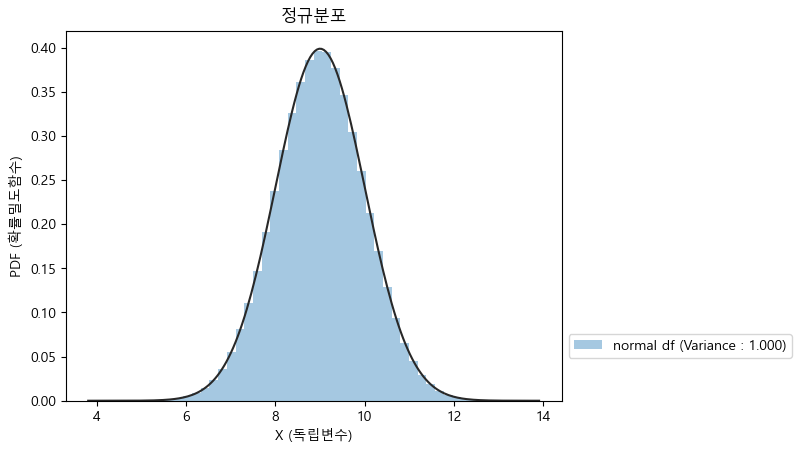

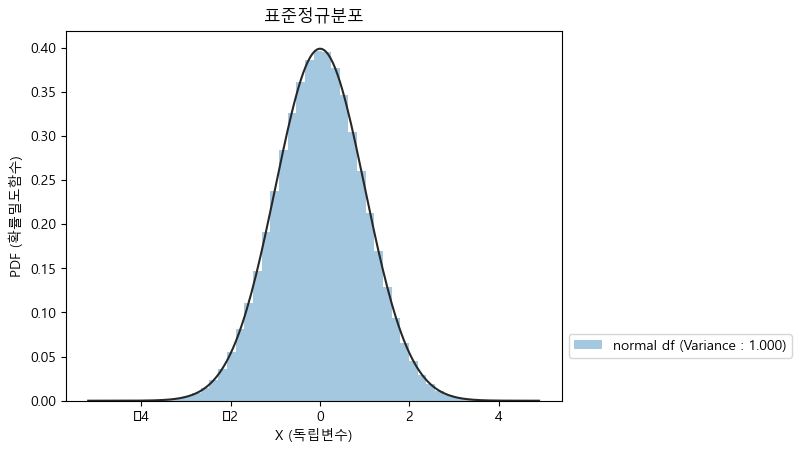

In [15]:
# 정규분포 형성 (평균 = 11-1, 표준편차 = 10)
normal_df(1000000, 1, 10)

# 표준정규분포 형성 (평균 = 1-1, 표준편차 = 1)
normal_df(1000000, 1, 1)

## B. T 분포

In [ ]:
# 라이브러리 호출
import math
import numpy as np
import matplotlib.pyplot as plt

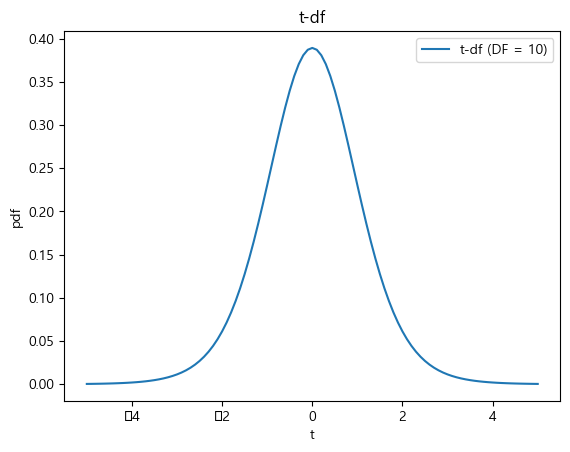

In [ ]:
t = np.linspace(-5, 5, 101)
#print(t)
#[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
#  -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
#  -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
#  -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
#   0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
#   2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
#   3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
#   4.8  4.9  5. ]
# 자유도 설정
DF = 10
y = (math.gamma((DF+1) / 2) / (math.gamma(DF / 2) * math.sqrt(math.pi * DF))) * (1 + t ** 2 / DF) ** (-(DF + 1) / 2)

plt.plot(t, y)                       
plt.xlabel("t")                    
plt.ylabel("pdf")                      
plt.title("t-df")
plt.legend([f"t-df (DF = {DF})"])
plt.show()


- k=1이면 코시분포와 동일
- 자유도가 커질수록 표준정규분포에 가까워짐
- 자유도는 t-분포의 모양(shape)을 결정하는 중요한 요소 중 하나입니다. t-분포의 자유도가 증가할수록 분포의 뾰족한 정도는 증가하며, 분포의 꼬리는 좀 더 빨리 감소합니다. 

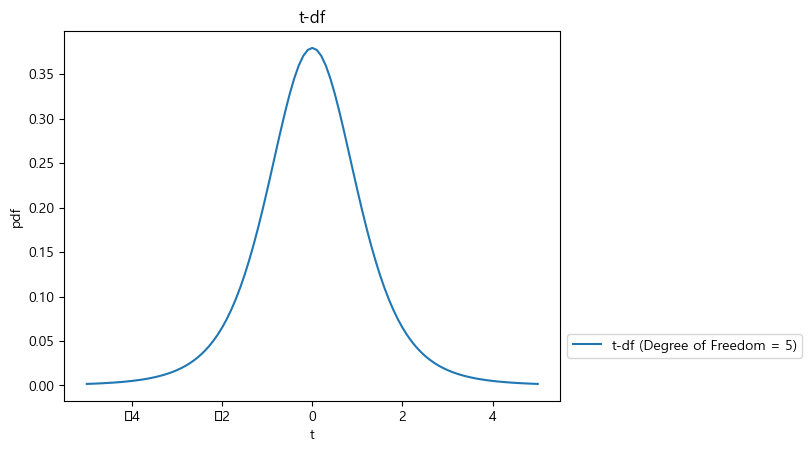

In [ ]:
def t_df(DF):
    # 라이브러리 호출
    import math
    import numpy as np
    import matplotlib.pyplot as plt

    t = np.linspace(-5, 5, 101)
    y = (math.gamma((DF+1) / 2) / (math.gamma(DF / 2) * math.sqrt(math.pi * DF))) * (1 + t ** 2 / DF) ** (-(DF + 1) / 2)

    plt.plot(t, y)                       
    plt.xlabel("t")                    
    plt.ylabel("pdf")                      
    plt.title("t-df")
    plt.legend([f"t-df (Degree of Freedom = {DF})"], bbox_to_anchor=(1, .2))
    plt.show()
    
t_df(5)

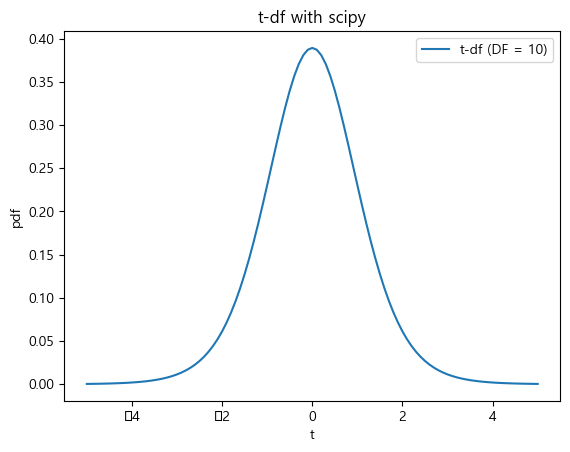

In [ ]:
# scipy의 stats 호출로 t 분포 그리기
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

DF = 10
t = np.linspace(-5, 5, 101)
y1 = stats.t(DF).pdf(t)
       
plt.plot(t, y1)
plt.xlabel("t")
plt.ylabel("pdf")
plt.title("t-df with scipy")
plt.legend([f"t-df (DF = {DF})"])
plt.show()

[0.00175744 0.00194357 0.00215233 0.0023868  0.00265052 0.00294754
 0.00328256 0.00366096 0.00408898 0.0045738  0.00512373 0.00574837
 0.00645885 0.00726802 0.00819077 0.00924435 0.01044871 0.01182693
 0.01340568 0.01521575 0.01729258 0.01967694 0.02241552 0.02556161
 0.02917574 0.03332624 0.03808966 0.04355096 0.04980335 0.05694754
 0.06509031 0.07434203 0.08481296 0.09660795 0.10981925 0.12451734
 0.14073955 0.15847674 0.17765861 0.19813859 0.2196798  0.24194434
 0.26448836 0.28676546 0.30814101 0.32791853 0.34537808 0.35982433
 0.37063998 0.37733813 0.37960669 0.37733813 0.37063998 0.35982433
 0.34537808 0.32791853 0.30814101 0.28676546 0.26448836 0.24194434
 0.2196798  0.19813859 0.17765861 0.15847674 0.14073955 0.12451734
 0.10981925 0.09660795 0.08481296 0.07434203 0.06509031 0.05694754
 0.04980335 0.04355096 0.03808966 0.03332624 0.02917574 0.02556161
 0.02241552 0.01967694 0.01729258 0.01521575 0.01340568 0.01182693
 0.01044871 0.00924435 0.00819077 0.00726802 0.00645885 0.0057

C:\Users\dgh06\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


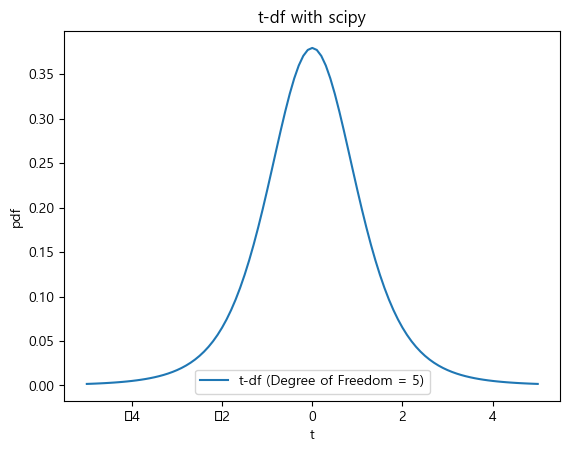

In [16]:
def t_df_stats(DF):
    import scipy.stats as stats
    import numpy as np
    import matplotlib.pyplot as plt

    t = np.linspace(-5, 5, 101)
    y1 = stats.t(DF).pdf(t)
    print(y1)
        
    plt.plot(t, y1)
    plt.xlabel("t")
    plt.ylabel("pdf")
    plt.title("t-df with scipy")
    plt.legend([f"t-df (Degree of Freedom = {DF})"])
    plt.show()
    
t_df_stats(5)

# C. F 분포

In [ ]:
import scipy.special as sp
import math
import numpy as np

# X축 값 설정 (0,5 사이에 일정한 거리로 1000개 데이터 입력)
x = np.linspace(0, 5, 1000)
# 각각의 독립적인 확률변수 데이터가 자유도 4, 10인 카이제곱 분포를 따르는 경우를 가정
nu1 = 4
nu2 = 10

# F분포를 따르는 확률변수를 생성
#https://datascienceschool.net/02%20mathematics/08.05%20%EC%8A%A4%ED%8A%9C%EB%8D%98%ED%8A%B8%20t%EB%B6%84%ED%8F%AC%2C%20%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%EB%B6%84%ED%8F%AC%2C%20F%EB%B6%84%ED%8F%AC.html
y = []
for f in x:
    y.append(( np.sqrt( ((nu1 * f) ** nu1 * nu2 ** nu2) / ((nu1 * f + nu2) ** (nu1 + nu2)) )) / 
            (f * sp.beta(nu1 / 2, nu2 / 2)))
# len(y)
# print(y)

C:\Users\dgh06\AppData\Local\Temp\ipykernel_27008\3797546403.py:15: RuntimeWarning: invalid value encountered in scalar divide
  y.append(( np.sqrt( ((nu1 * f) ** nu1 * nu2 ** nu2) / ((nu1 * f + nu2) ** (nu1 + nu2)) )) /


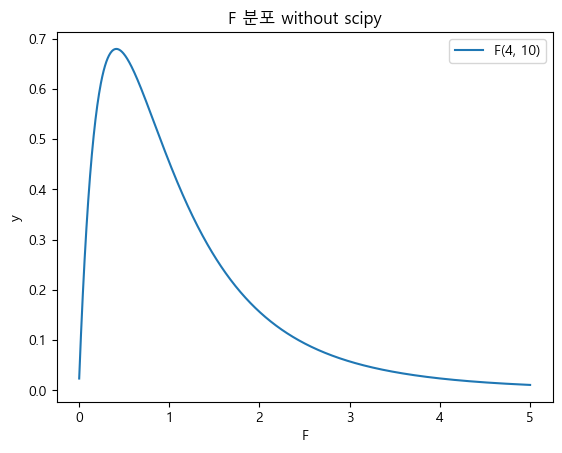

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x, y, label=f'F({nu1}, {nu2})')                       
plt.xlabel('F')
plt.ylabel("y")
plt.title('F 분포 without scipy')
plt.legend()
plt.show()

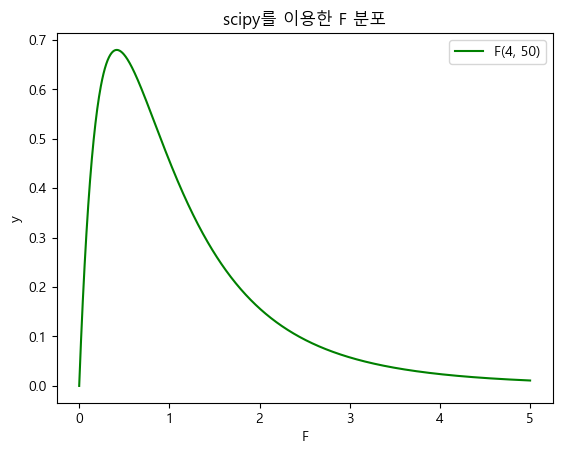

In [ ]:
# scipy를 이용한 F분포 형성
import scipy.stats as stats

# 카이제곱분포를 따르는 확률변수의 자유도가 nu1, nu2일 때 F분포의 확률밀도함수는 y1으로 정의된다.
y1 = stats.f(nu1, nu2).pdf(x)        


plt.plot(x, y1, color="g", label='F(4, 50)')             
plt.xlabel('F')
plt.ylabel("y")
plt.title('scipy를 이용한 F 분포')
plt.legend()
plt.show()

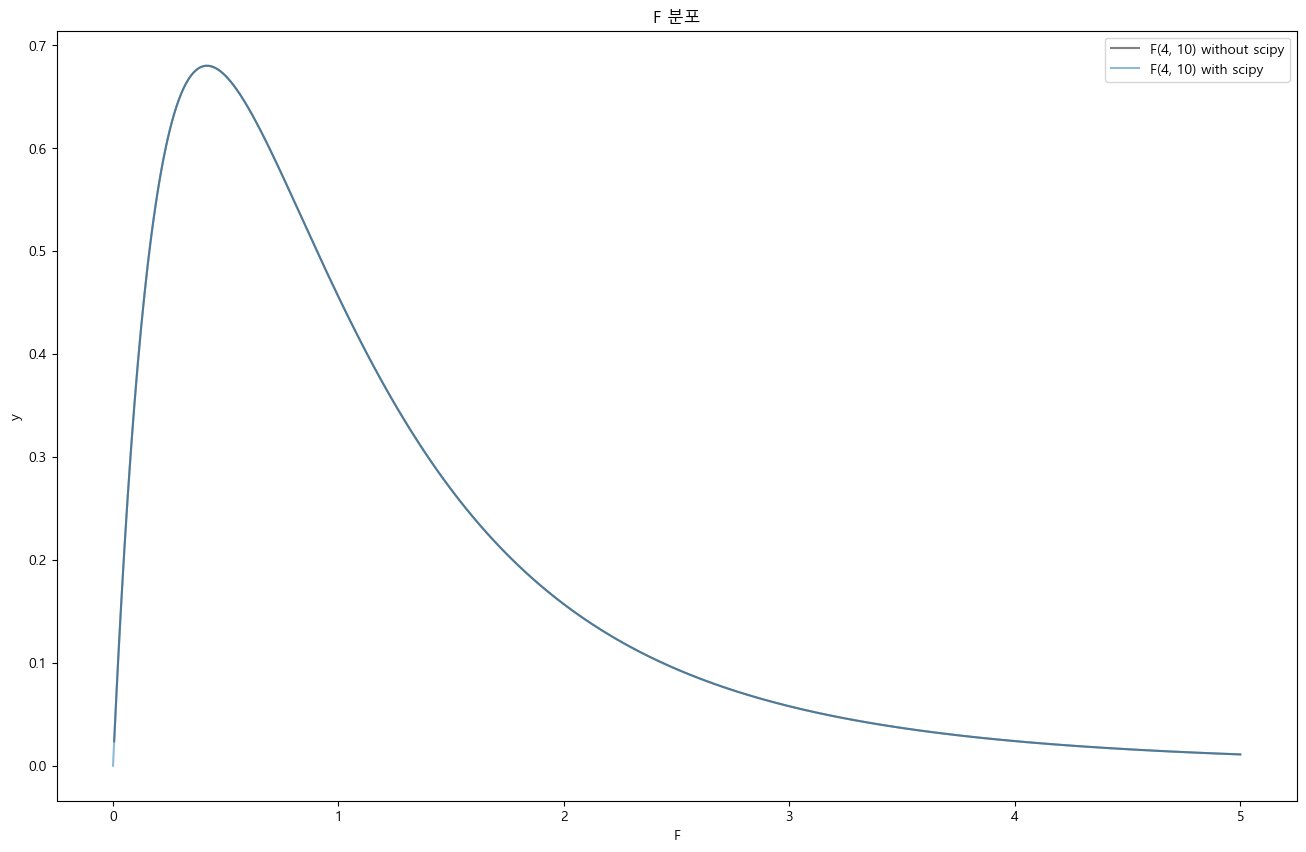

In [ ]:
# 과연 위에서 형성한 두 분포가 일치하는지 검토해보는 부분
import matplotlib.pyplot as plt
import scipy.stats as stats

# 카이제곱분포를 따르는 확률변수의 자유도가 nu1, nu2일 때 F분포의 확률밀도함수는 y1으로 정의된다.
y1 = stats.f(nu1, nu2).pdf(x)        

plt.figure(figsize=(16,10))
plt.plot(x, y, alpha=.5, color="k", label=f'F({nu1}, {nu2}) without scipy')  
plt.plot(x, y1, alpha=.5, label=f'F({nu1}, {nu2}) with scipy')                                  
plt.xlabel('F')
plt.ylabel("y")
plt.title('F 분포')
plt.legend()
plt.show()

# D. 카이제곱 분포

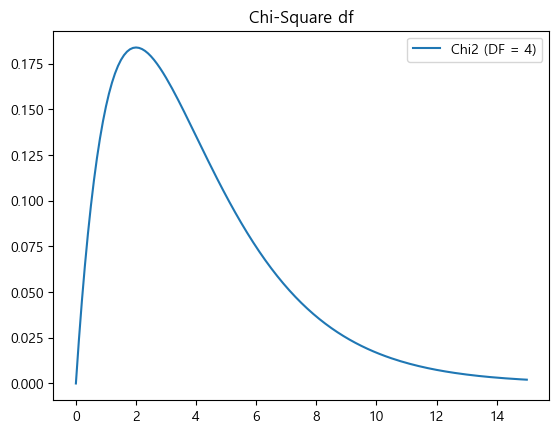

In [ ]:
# 라이브러리 호출
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

DF = 4

# 데이터 형성 
X = np.linspace(0, 15, 151)

# 시각화
plt.plot(X, sp.stats.chi2(DF).pdf(X), label=f"Chi2 (DF = {DF})")
plt.legend()
plt.title('Chi-Square df')
plt.show()

In [ ]:
def chi2(DF):
    import numpy as np
    from scipy.stats import chi2
    import matplotlib.pyplot as plt

    X = np.linspace(0, 15, 151)

    plt.plot(X, chi2(DF).pdf(X), label=f"Chi2 (Degree of Freedom = {DF})")
    plt.legend()
    plt.title('Chi-Square df')
    plt.show()